In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

##### Fig 1.1

In [48]:
#up2024_0421_13:55

loc_0 = 'E:/zyf_gn/zyf_gn_2301_data/ppa_2301_k2/V2/DATA_ANA_1/' #to_be_set
loc_1 = 'E:/zyf_gn/zyf_gn_2301_data/ppa_2301_k2/V2/DATA_ANA_1/RES/' #to_be_set
loc_2 = 'E:/zyf_gn/zyf_gn_2301_data/ppa_2301_k2/V2/DATA_ANA_1/FIG/' #to_be_set
var_names = pd.read_csv(loc_0 +'var_names.csv')
print('var_names:\n', var_names)

var_names:
            var var_name     var_name3
0          dem      ELE       ELE (m)
1        slope      SLP      SLP (��)
2         ndvi     NDVI          NDVI
3   XB1_mean_1      FAR           FAR
4   XB1_mean_2      MBH       MBH (m)
5    XB1_ratio      BCR       BCR (%)
6       rotate      ROT      ROT (��)
7      BEARING      ORI      ORI (��)
8       aspect   ASPECT   ASPECT (��)
9       length       RW        RW (m)
10   XL_ai_imp     AI_I      AI_I (%)
11   XL_ai_gre     AI_V      AI_V (%)
12   XL_ps_imp  PLAND_I   PLAND_I (%)
13   XL_ps_gre  PLAND_V   PLAND_V (%)
14       XL_pd       PD  PD (100ha-1)


In [26]:
#up2024_0421_13:56

def var_names_f(f_1):
    f_order = var_names['var'].tolist().index(f_1)
    f_name = var_names['var_name'][f_order]
    return(f_name)

In [73]:
#up2024_0428_16:20

def var_names_f3(f_1):
    f_order = var_names['var'].tolist().index(f_1)
    f_name = var_names['var_name'][f_order]
    if (f_name == 'ELE')|(f_name == 'MBH')|(f_name == 'RW'):
        f_2 = '(m)'
    elif (f_name == 'BCR')|(f_name == 'AI_I')|(f_name == 'AI_V')|(f_name == 'PLAND_I')|(f_name == 'PLAND_V'):
        f_2 = '(%)'
    elif (f_name == 'SLP')|(f_name == 'ROT')|(f_name == 'ORI')|(f_name == 'ASPECT'):
        f_2 = '(°)'
    elif (f_name == 'NDVI')|(f_name == 'FAR'):
        f_2 = ' '
    elif f_name == 'PD':
        f_2 = '(100ha$^{-1}$ )'
    else:
        print('ERROR')
    f_3 = f_name + ' ' + f_2
    return(f_3)

In [27]:
#up2024_0421_14:06

vari_y_0 = ['XY_rci', 'XY_rcd', 'XY_crci']   #to_be_set
vari_y_1 = ['RCI', 'RCD', 'CRCI']  #to_be_set
order_0 = ['5','4']  #to_be_set
title_0 = ['Normal summer day', 'Extremely hot day']   #to_be_set
subtitle_0 = ['(a)', '(b)']   #to_be_set

name_v = dict()
data_v = dict()
vari_v = dict()
value_v = dict()

for ii in range(len(vari_y_0)):
    name_v[ii] = dict()
    data_v[ii] = dict()
    vari_v[ii] = dict()
    value_v[ii] = dict()
    for jj in range(len(order_0)):
        name_v[ii][jj] = loc_1 + '2301_brt_impor_1_' + order_0[jj] + '_'  + vari_y_0[ii] + '.csv'
        data_v[ii][jj] = pd.read_csv(name_v[ii][jj])
        vari_v[ii][jj] = data_v[ii][jj]['var']
        value_v[ii][jj] = data_v[ii][jj]['rel.inf']

print('================')
#print(name_v[0])
#print(name_v[1])
#print(data_v[0])
#print(data_v[1])
#print(vari_v[0])
#print(vari_v[1])
#print(value_v[0])
#print(value_v[1])
print('================')
data_len = data_v[0][0].shape[0]
print('data_len:\n', data_len)

data_len:
 13


In [28]:
#up2024_0421_14:11

var_names2_v = dict()

for ii in range(len(vari_y_0)):
    var_names2_v[ii] = dict()
    for jj in range(len(order_0)):
        var_names2_v[ii][jj] = []
        for kk in range(data_len):
            var_names2_v[ii][jj].append(var_names_f(vari_v[ii][jj][kk]))

print(var_names2_v[0][0])
print(var_names2_v[0][1])
print(var_names2_v[1][0])
print(var_names2_v[1][1])

['SLP', 'RW', 'ELE', 'PD', 'AI_I', 'ROT', 'ORI', 'MBH', 'AI_V', 'PLAND_I', 'PLAND_V', 'BCR', 'FAR']
['ELE', 'SLP', 'PD', 'RW', 'AI_V', 'PLAND_I', 'AI_I', 'ROT', 'MBH', 'PLAND_V', 'ORI', 'FAR', 'BCR']
['ELE', 'SLP', 'PD', 'AI_I', 'ROT', 'RW', 'AI_V', 'MBH', 'ORI', 'PLAND_V', 'PLAND_I', 'FAR', 'BCR']
['ELE', 'PD', 'SLP', 'PLAND_V', 'ORI', 'ROT', 'PLAND_I', 'AI_V', 'RW', 'AI_I', 'BCR', 'MBH', 'FAR']


In [29]:
#up2024_0421_14:14

def me_data_rela(f_me_data):
    f_me_max = np.max(f_me_data)
    f_me_min = np.min(f_me_data)
    f_me_mean = np.mean(f_me_data)
    f_me_len = len(f_me_data)
    f_me_data2 = np.zeros(f_me_len)
    for ii in range(f_me_len):
        f_me_data2[ii] = 2 * (f_me_data[ii] - f_me_mean)/(f_me_max - f_me_min)
    return(f_me_data2)

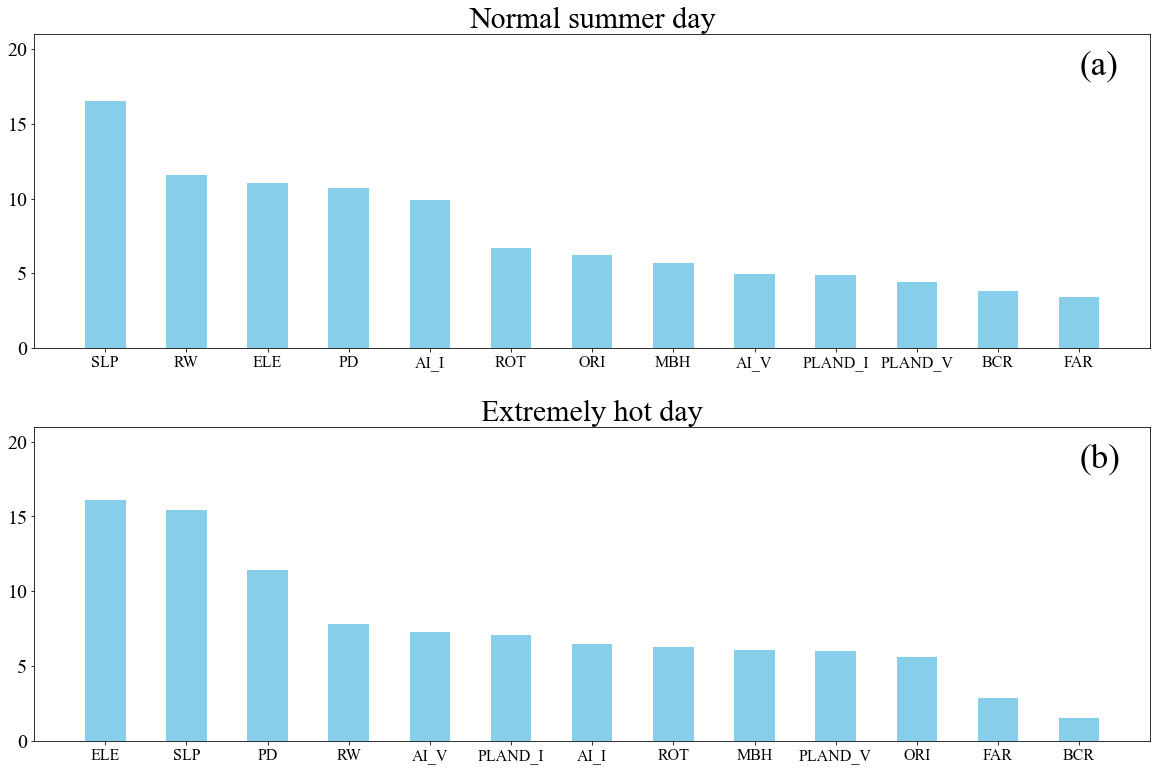

In [30]:
#up2024_0421_14:19

iy_set1 = 0 #to_be_set
y_tick_set1 = np.arange(0,22,5) #to_be_set
fig = plt.figure(figsize=(20, 13))
for ii in range(len(order_0)):
    ax = fig.add_subplot(len(order_0), 1, ii + 1)
    ax.bar(range(len(value_v[iy_set1][ii])), value_v[iy_set1][ii], fc='skyblue', width = 0.5)
    ax.set_xticks(np.arange(0, data_len))
    ax.set_xticklabels(var_names2_v[iy_set1][ii], fontsize = 16, fontname='Times New Roman')
    ax.set_yticks(y_tick_set1)
    ax.set_yticklabels(y_tick_set1, fontsize = 20, fontname='Times New Roman')
    ax.set_ylim(0, 21) #to_be_set
    ax.set_title(title_0[ii], fontsize = 30, fontname='Times New Roman')
    ax.text(12, 18.3, subtitle_0[ii], fontsize=35, color='black', fontname='Times New Roman') #to_be_set
    
plt.subplots_adjust(wspace = 0, hspace =0.25)#调整子图间距
plt.savefig(loc_2 +'FIG_RC' + vari_y_0[iy_set1] + '.jpg', format='jpg', dpi=300)

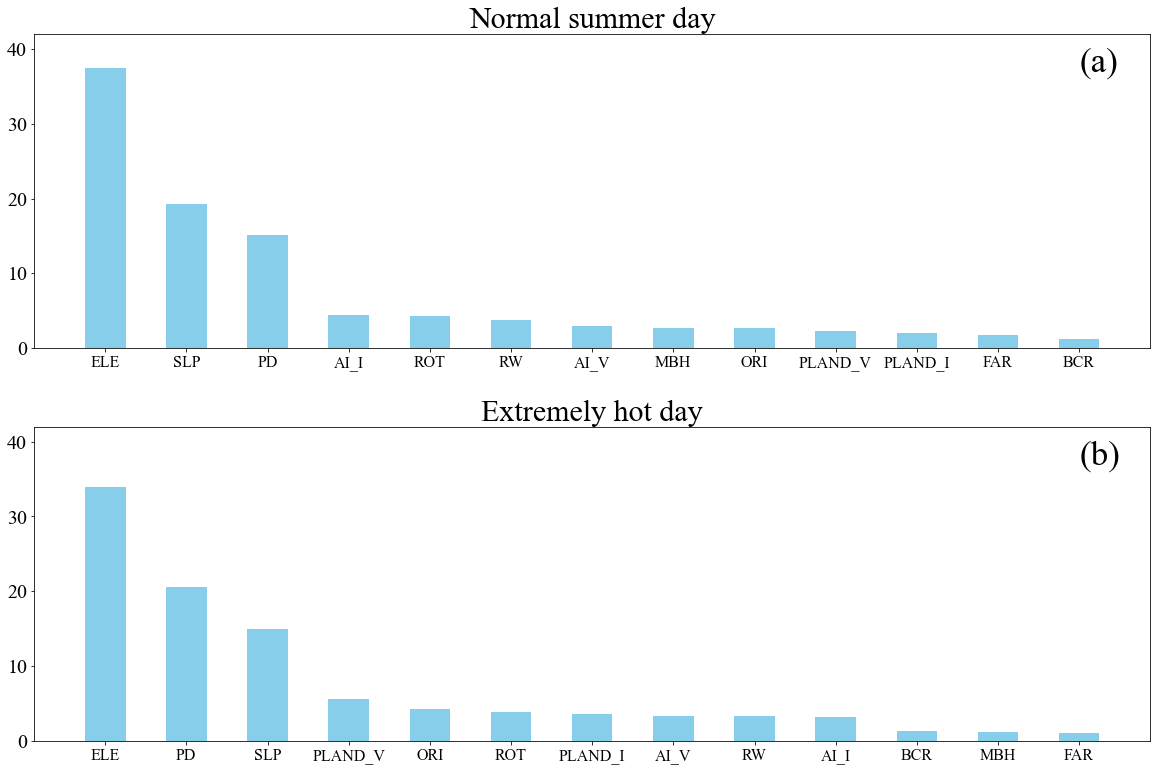

In [31]:
#up2024_0421_14:19

iy_set2 = 1 #to_be_set
y_tick_set2 = np.arange(0, 41, 10) #to_be_set
fig = plt.figure(figsize=(20, 13))
for ii in range(len(order_0)):
    ax = fig.add_subplot(len(order_0), 1, ii + 1)
    ax.bar(range(len(value_v[iy_set2][ii])), value_v[iy_set2][ii], fc='skyblue', width = 0.5)
    ax.set_xticks(np.arange(0, data_len))
    ax.set_xticklabels(var_names2_v[iy_set2][ii], fontsize = 16, fontname='Times New Roman')
    ax.set_yticks(y_tick_set2)
    ax.set_yticklabels(y_tick_set2, fontsize = 20, fontname='Times New Roman')
    ax.set_ylim(0, 42) #to_be_set
    ax.set_title(title_0[ii], fontsize = 30, fontname='Times New Roman')
    ax.text(12, 37, subtitle_0[ii], fontsize=35, color='black', fontname='Times New Roman') #to_be_set
    
plt.subplots_adjust(wspace = 0, hspace =0.25)   #调整子图间距
plt.savefig(loc_2 +'FIG_RC' + vari_y_0[iy_set2] + '.jpg', format='jpg', dpi=300)

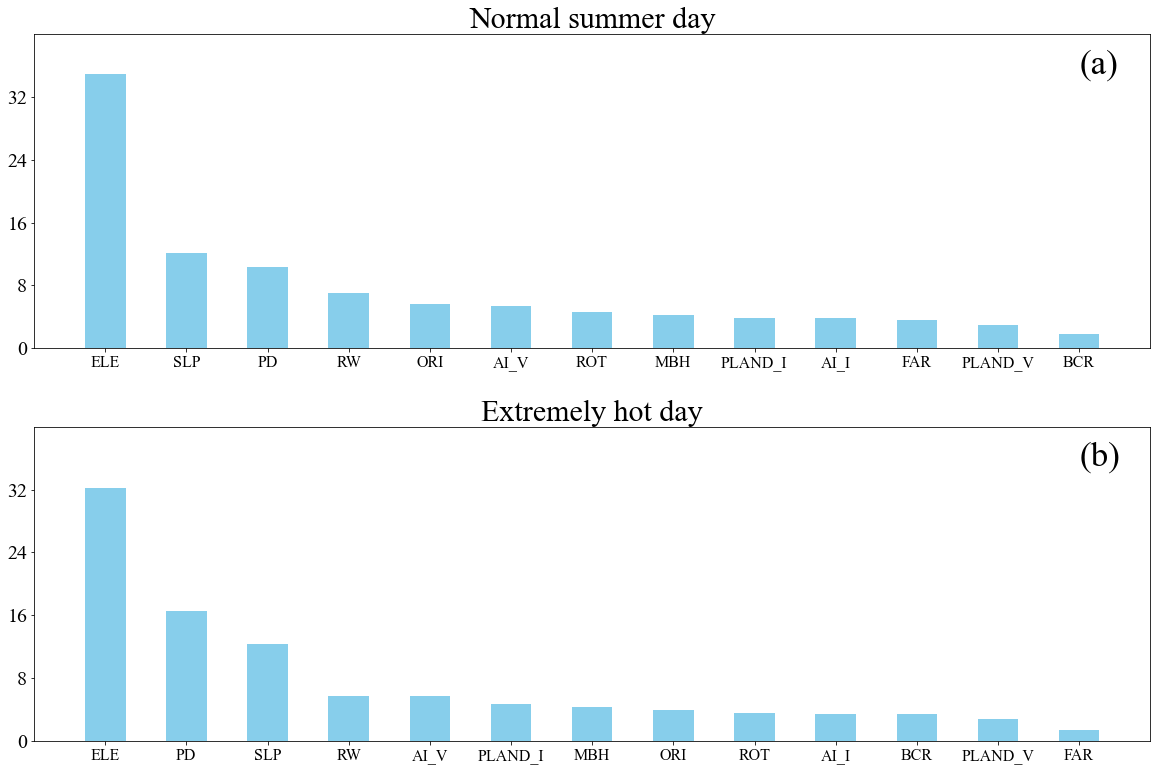

In [32]:
#up2024_0421_14:19

iy_set3 = 2 #to_be_set
y_tick_set3 = np.arange(0, 36, 8) #to_be_set
fig = plt.figure(figsize=(20, 13))
for ii in range(len(order_0)):
    ax = fig.add_subplot(len(order_0), 1, ii + 1)
    ax.bar(range(len(value_v[iy_set3][ii])), value_v[iy_set3][ii], fc='skyblue', width = 0.5)
    ax.set_xticks(np.arange(0, data_len))
    ax.set_xticklabels(var_names2_v[iy_set3][ii], fontsize = 16, fontname='Times New Roman')
    ax.set_yticks(y_tick_set3)
    ax.set_yticklabels(y_tick_set3, fontsize = 20, fontname='Times New Roman')
    ax.set_ylim(0, 40) #to_be_set
    ax.set_title(title_0[ii], fontsize = 30, fontname='Times New Roman')
    ax.text(12, 35, subtitle_0[ii], fontsize=35, color='black', fontname='Times New Roman') #to_be_set
    
plt.subplots_adjust(wspace = 0, hspace =0.25)   #调整子图间距
plt.savefig(loc_2 +'FIG_RC' + vari_y_0[iy_set3] + '.jpg', format='jpg', dpi=300)

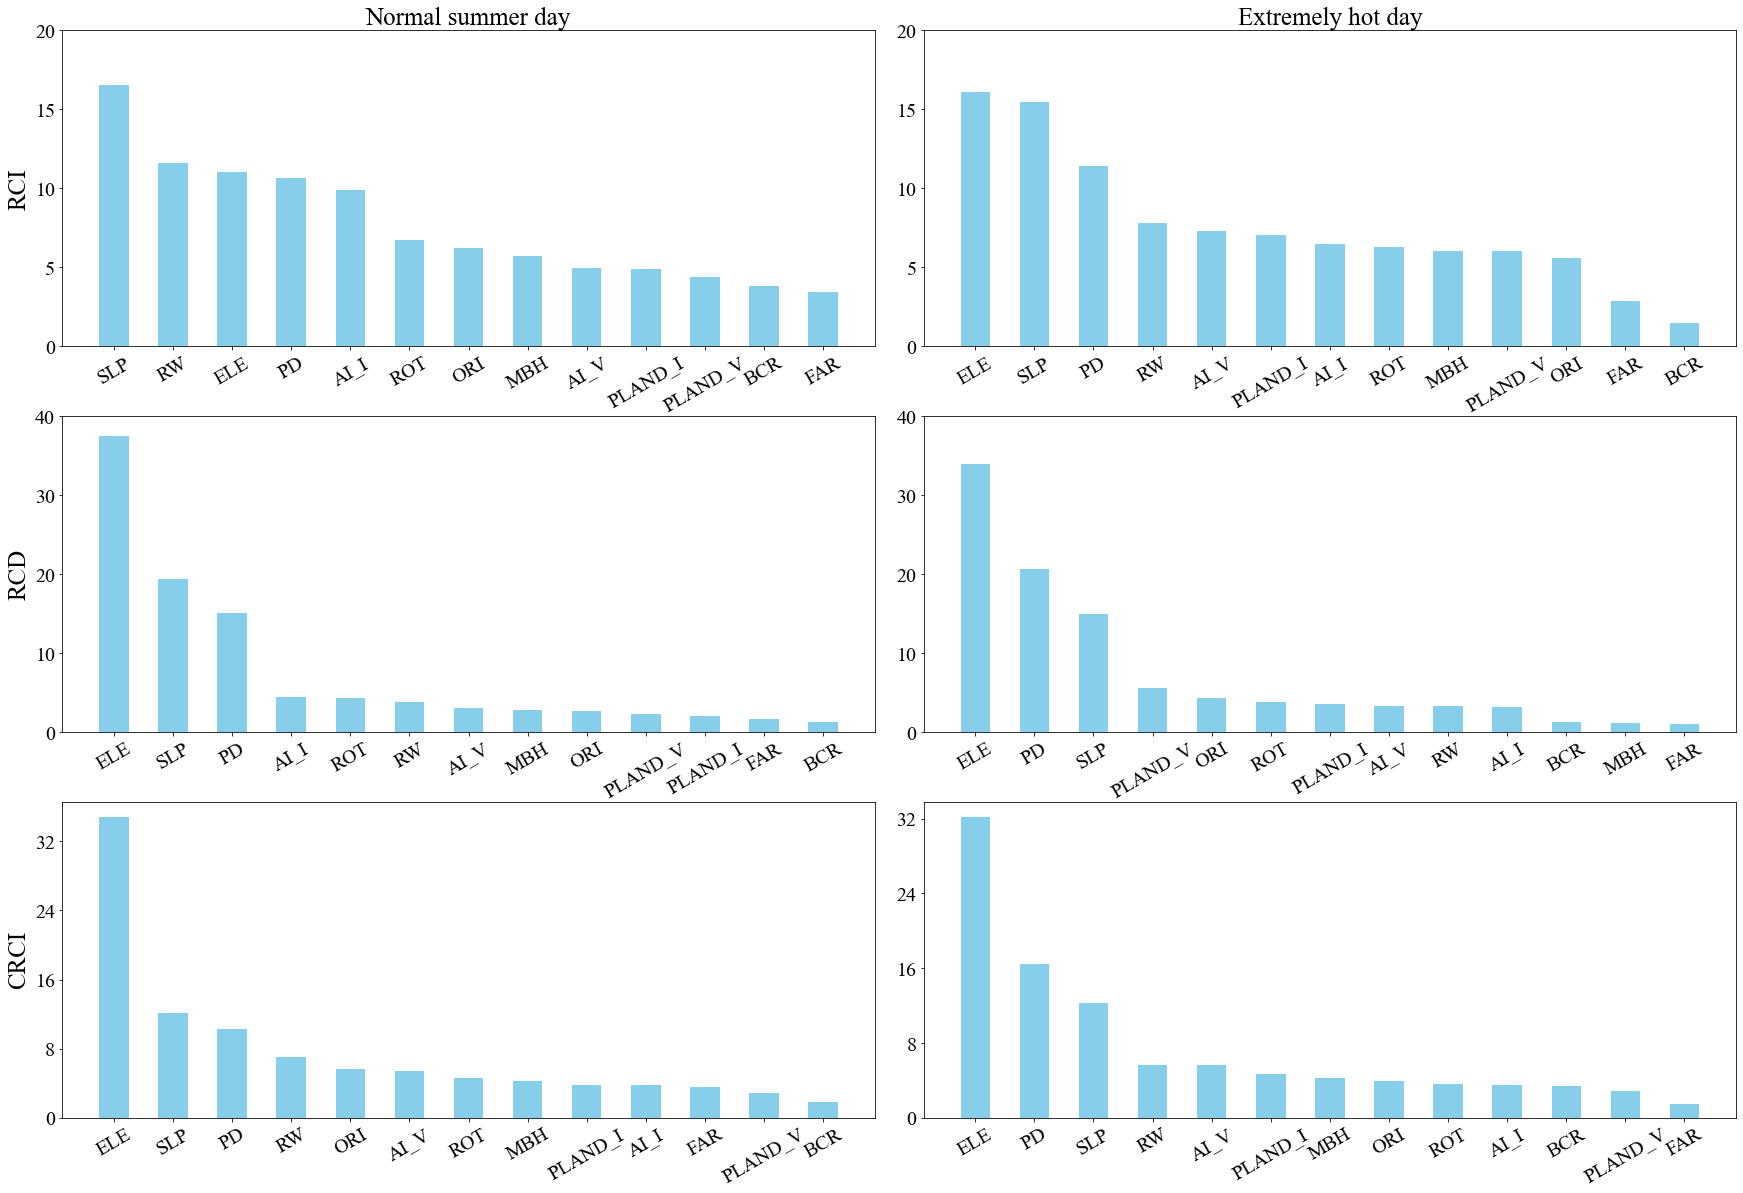

In [33]:
#up2024_0422_18:19

y_tick_set = dict()
y_tick_set[1] = np.arange(0,22,5)
y_tick_set[2] = np.arange(0,41,10)
y_tick_set[3] = np.arange(0,36,8)

kk = 0
fig = plt.figure(figsize=(30, 20))
for ii in range(len(vari_y_0)):
    for jj in range(len(order_0)):
        kk = kk + 1
        ax = fig.add_subplot(len(vari_y_0), len(order_0), kk)
        ax.bar(range(len(value_v[ii][jj])), value_v[ii][jj], fc='skyblue', width = 0.5)
        ax.set_xticks(np.arange(0, data_len))
        ax.set_xticklabels(var_names2_v[ii][jj], fontsize = 20, fontname='Times New Roman', rotation = 30)       
        ax.set_yticks(y_tick_set[ii + 1])
        ax.set_yticklabels(y_tick_set[ii + 1], fontsize = 20, fontname='Times New Roman')
        if ii == 0:
            ax.set_title(title_0[jj], fontsize = 25, fontname='Times New Roman')
        if jj == 0:
            ax.set_ylabel(vari_y_1[ii], fontsize = 25, fontname='Times New Roman')
plt.subplots_adjust(wspace = 0.06, hspace = 0.22)#调整子图间距
plt.savefig(loc_2 +'FIG_RC.jpg', format='jpg', dpi=300)

##### Fig 1.2

In [75]:
#up2024_0421_14:41

me_size = 5 #to_be_set

vari_f2 = dict()
vari_name_f3b = dict()
me_data = dict()

for ii in range(len(vari_y_0)):
    vari_f2[ii] = dict()
    vari_name_f3b[ii] = dict()
    me_data[ii] = dict()
    for jj in range(len(order_0)):
        vari_f2[ii][jj] = vari_v[ii][jj].values[0: me_size]
        me_data[ii][jj] = dict()
        vari_name_f3b[ii][jj] = []
        for kk in range(me_size):
            me_data[ii][jj][kk] = pd.read_csv(loc_1 + '2301_brt_partial_' + order_0[jj] + '_' + vari_y_0[ii] + '_' + vari_f2[ii][jj][kk] + '.csv')
            vari_name_f3b[ii][jj].append(var_names_f3(vari_f2[ii][jj][kk]))
print(vari_f2[0][0])
print(vari_name_f3b[0][0])

['slope' 'length' 'dem' 'XL_pd' 'XL_ai_imp']
['SLP (°)', 'RW (m)', 'ELE (m)', 'PD (100ha$^{-1}$ )', 'AI_I (%)']


In [69]:
#up2024_0421 15:02

f2_xt = dict()
f2_xt[0] = dict()
f2_xt[1] = dict()

f2_xt[0][0] = np.arange(0,50,10) #to_be_set
f2_xt[0][1] = np.arange(200,1200,200) #to_be_set
f2_xt[0][2] = np.arange(170,250,30) #to_be_set
f2_xt[0][3] = np.arange(20,130,30) #to_be_set

f2_xt[1][0] = np.arange(160,260,20) #to_be_set
f2_xt[1][1] = np.arange(5,40,10) #to_be_set
f2_xt[1][2] = np.arange(20,130,30) #to_be_set
f2_xt[1][3] = np.arange(200,1200,200) #to_be_set


In [36]:
#up2024_0421 15:10

f2_yt = dict()
f2_yt[0] = dict()
f2_yt[1] = dict()

f2_yt[0][0] = np.arange(-1,2,1) #to_be_set
f2_yt[0][1] = np.arange(-1,2,1) #to_be_set
f2_yt[0][2] = np.arange(-1,2,1) #to_be_set
f2_yt[0][3] = np.arange(-1,2,1) #to_be_set

f2_yt[1][0] = np.arange(-1,2,1) #to_be_set
f2_yt[1][1] = np.arange(-1,2,1) #to_be_set
f2_yt[1][2] = np.arange(-1,2,1) #to_be_set
f2_yt[1][3] = np.arange(-1,2,1) #to_be_set


In [111]:
#up2024_0421 15:42
f2_z0 = np.array([2,179,165,7,163,4,2,190]).reshape(2,4) #to_be_set
f2_z1 = np.array([-1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65]).reshape(2,4) #to_be_set
print(f2_z0)
print(f2_z1)

[[  2 179 165   7]
 [163   4   2 190]]
[[-1.65 -1.65 -1.65 -1.65]
 [-1.65 -1.65 -1.65 -1.65]]


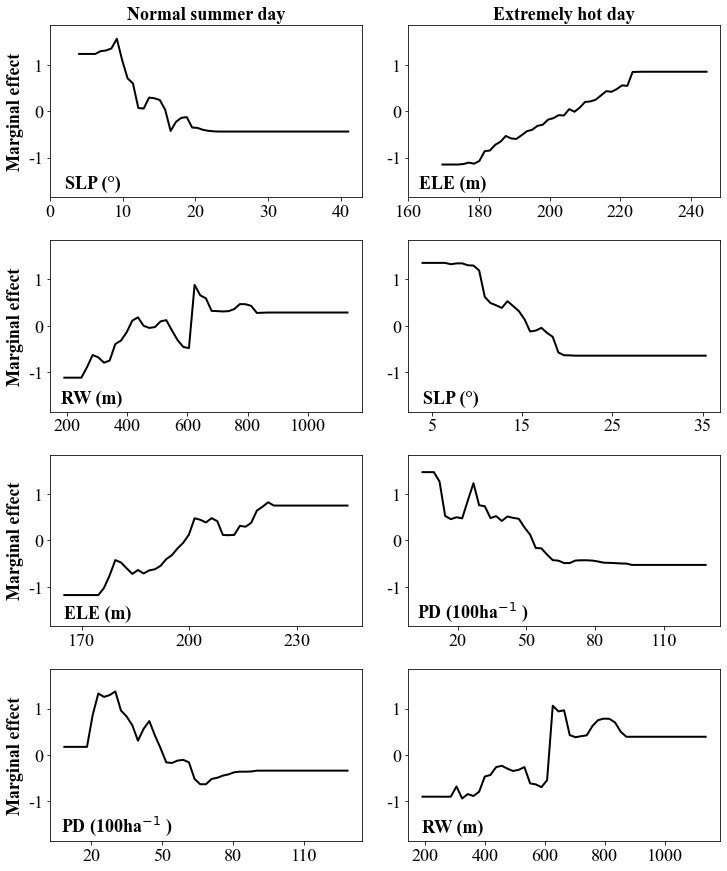

In [112]:
#up2024_0421 15:10

vy_set_1 = 0 #to_be_set
vari_num_1 = 4 #to_be_set

fig = plt.figure(figsize=(12,15))
kk = 0
for jj in range(vari_num_1): #to_be_set
    for ii in range(len(order_0)):
        
        c_vari_name = vari_f2[vy_set_1][ii][jj]
        c_f1_x = me_data[vy_set_1][ii][jj][c_vari_name].values
        c_f1_y0 = me_data[vy_set_1][ii][jj]['yhat'].values
        c_f1_y = me_data_rela(c_f1_y0)
        kk = kk + 1
        ax = fig.add_subplot(vari_num_1,len(order_0), kk)
        ax.plot(c_f1_x,c_f1_y, linewidth = 2, color = 'black')
        
        if ii == 0:
            ax.set_ylabel('Marginal effect', fontsize = 18, fontname='Times New Roman', fontweight='bold')
        if jj == 0:
            ax.set_title(title_0[ii], fontsize = 18, fontname='Times New Roman', fontweight='bold')
            
        ax.set_xticks(f2_xt[ii][jj])
        ax.set_xticklabels(f2_xt[ii][jj], fontsize = 18, fontname='Times New Roman')
        ax.set_ylim(-1.85, 1.85)
        ax.set_yticks(f2_yt[ii][jj])
        ax.set_yticklabels(f2_yt[ii][jj], fontsize = 18, fontname='Times New Roman')
        ax.text(f2_z0[ii,jj], f2_z1[ii,jj], vari_name_f3b[vy_set_1][ii][jj], fontsize= 18, fontweight='bold', color='black', fontname='Times New Roman')
        
        #print("=====%s=========%s=========" % (ii, jj))
        #print(c_f1_x)
        #print(c_f1_y)
plt.subplots_adjust(wspace = 0.15, hspace = 0.25)  #调整子图间距
plt.savefig(loc_2 +'FIG_ME' + vari_y_0[vy_set_1] + '.jpg', format='jpg', dpi=300)

In [39]:
#up2024_0421 15:02

f2_xt2 = dict()
f2_xt2[0] = dict()
f2_xt2[1] = dict()

f2_xt2[0][0] = np.arange(160,260,20) #to_be_set
f2_xt2[0][1] = np.arange(0,50,10) #to_be_set
f2_xt2[0][2] = np.arange(0,130,30) #to_be_set
f2_xt2[0][3] = np.arange(0,100,30) #to_be_set

f2_xt2[1][0] = np.arange(170,240,20) #to_be_set
f2_xt2[1][1] = np.arange(20,110,20) #to_be_set
f2_xt2[1][2] = np.arange(0,50,10) #to_be_set
f2_xt2[1][3] = np.arange(20,110,20) #to_be_set


In [40]:
#up2024_0421 15:10

f2_yt2 = dict()
f2_yt2[0] = dict()
f2_yt2[1] = dict()

f2_yt2[0][0] = np.arange(-1,2,1) #to_be_set
f2_yt2[0][1] = np.arange(-1,2,1) #to_be_set
f2_yt2[0][2] = np.arange(-1,2,1) #to_be_set
f2_yt2[0][3] = np.arange(-1,2,1) #to_be_set

f2_yt2[1][0] = np.arange(-1,2,1) #to_be_set
f2_yt2[1][1] = np.arange(-1,2,1) #to_be_set
f2_yt2[1][2] = np.arange(-1,2,1) #to_be_set
f2_yt2[1][3] = np.arange(-1,2,1) #to_be_set


In [119]:
#up2024_0421 15:42
f2_z2_0 = np.array([163,2,2,0,165,6,1,-2]).reshape(2,4) #to_be_set
f2_z2_1 = np.array([-1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65]).reshape(2,4) #to_be_set
print(f2_z2_0)
print(f2_z2_1)

[[163   2   2   0]
 [165   6   1  -2]]
[[-1.65 -1.65 -1.65 -1.65]
 [-1.65 -1.65 -1.65 -1.65]]


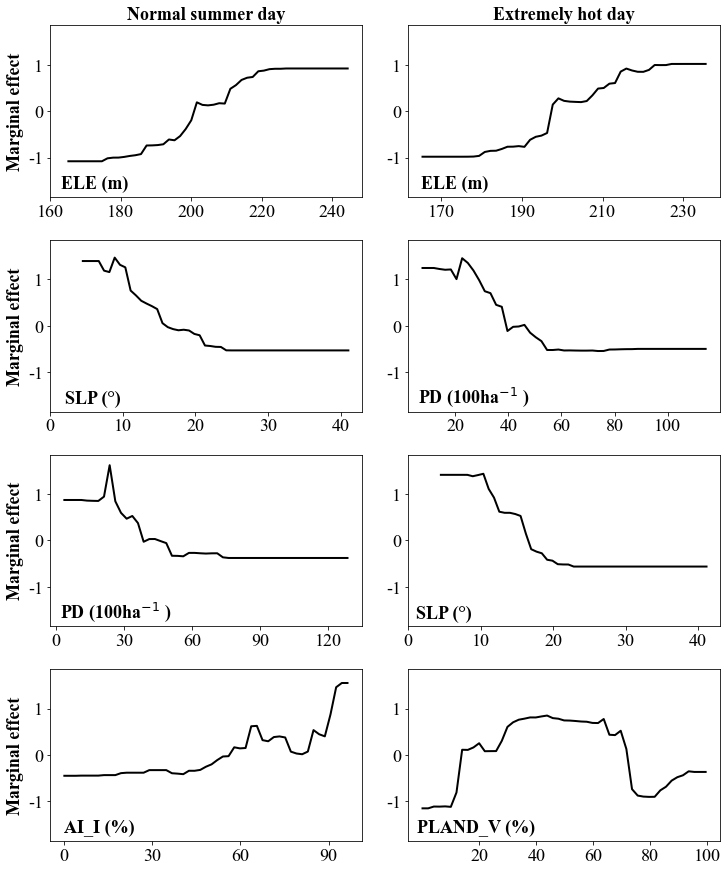

In [120]:
#up2024_0421 15:10

vy_set_2 = 1 #to_be_set
vari_num_1 = 4 #to_be_set

fig = plt.figure(figsize=(12,15))
kk = 0
for jj in range(vari_num_1): #to_be_set
    for ii in range(len(order_0)):
        #print("%s %s" % (ii, jj))
        c_vari_name = vari_f2[vy_set_2][ii][jj]
        c_f1_x = me_data[vy_set_2][ii][jj][c_vari_name].values
        c_f1_y0 = me_data[vy_set_2][ii][jj]['yhat'].values
        c_f1_y = me_data_rela(c_f1_y0)
        kk = kk + 1
        ax = fig.add_subplot(vari_num_1,len(order_0), kk)
        ax.plot(c_f1_x,c_f1_y, linewidth = 2, color = 'black')
        
        if ii == 0:
            ax.set_ylabel('Marginal effect', fontsize = 18, fontname='Times New Roman', fontweight='bold')
        if jj == 0:
            ax.set_title(title_0[ii], fontsize = 18, fontname='Times New Roman', fontweight='bold')
            
        ax.set_xticks(f2_xt2[ii][jj])
        ax.set_xticklabels(f2_xt2[ii][jj], fontsize = 18, fontname='Times New Roman')
        ax.set_ylim(-1.85, 1.85)
        ax.set_yticks(f2_yt2[ii][jj])
        ax.set_yticklabels(f2_yt2[ii][jj], fontsize = 18, fontname='Times New Roman')
        
        ax.text(f2_z2_0[ii,jj], f2_z2_1[ii,jj], vari_name_f3b[vy_set_2][ii][jj], fontsize= 18, fontweight='bold', color='black', fontname='Times New Roman')
        
plt.subplots_adjust(wspace = 0.15, hspace = 0.25)  #调整子图间距
plt.savefig(loc_2 +'FIG_ME' + vari_y_0[vy_set_2] + '.jpg', format='jpg', dpi=300)

In [43]:
#up2024_0421 15:02

f2_xt3 = dict()
f2_xt3[0] = dict()
f2_xt3[1] = dict()

f2_xt3[0][0] = np.arange(160,260,20) #to_be_set
f2_xt3[0][1] = np.arange(5,45,10) #to_be_set
f2_xt3[0][2] = np.arange(0,130,30) #to_be_set
f2_xt3[0][3] = np.arange(200,1100,200) #to_be_set

f2_xt3[1][0] = np.arange(170,240,20) #to_be_set
f2_xt3[1][1] = np.arange(10,120,30) #to_be_set
f2_xt3[1][2] = np.arange(0,50,10) #to_be_set
f2_xt3[1][3] = np.arange(200,1100,200) #to_be_set


In [44]:
#up2024_0421 15:10

f2_yt3 = dict()
f2_yt3[0] = dict()
f2_yt3[1] = dict()

f2_yt3[0][0] = np.arange(-1,2,1) #to_be_set
f2_yt3[0][1] = np.arange(-1,2,1) #to_be_set
f2_yt3[0][2] = np.arange(-1,2,1) #to_be_set
f2_yt3[0][3] = np.arange(-1,2,1) #to_be_set

f2_yt3[1][0] = np.arange(-1,2,1) #to_be_set
f2_yt3[1][1] = np.arange(-1,2,1) #to_be_set
f2_yt3[1][2] = np.arange(-1,2,1) #to_be_set
f2_yt3[1][3] = np.arange(-1,2,1) #to_be_set


In [130]:
#up2024_0421 15:42
f2_z3_0 = np.array([165,4,2,195,165,2,1,195]).reshape(2,4) #to_be_set
f2_z3_1 = np.array([-1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65]).reshape(2,4) #to_be_set
print(f2_z3_0)
print(f2_z3_1)

[[165   4   2 195]
 [165   2   1 195]]
[[-1.65 -1.65 -1.65 -1.65]
 [-1.65 -1.65 -1.65 -1.65]]


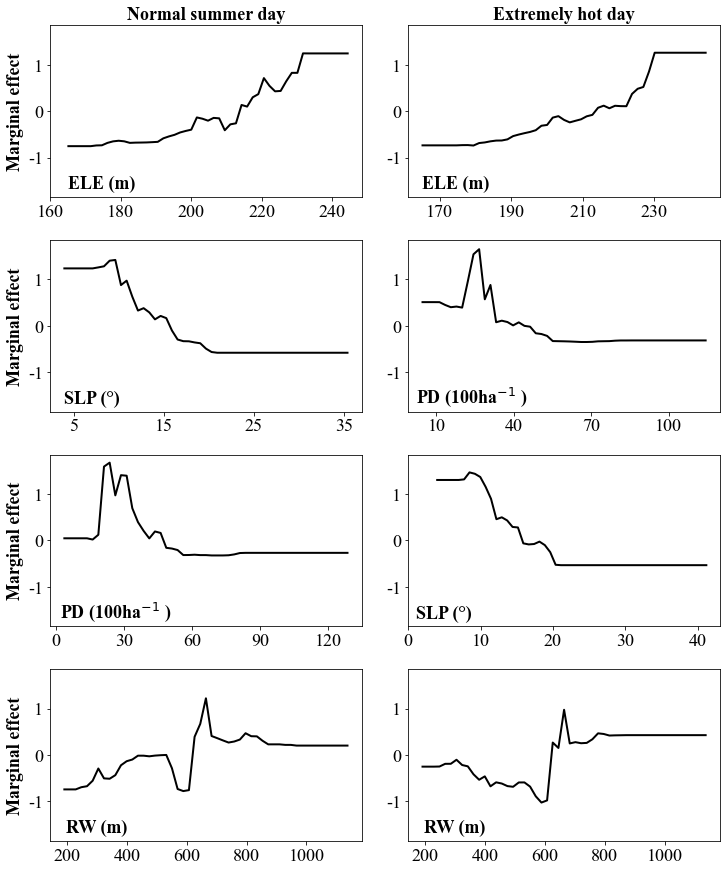

In [131]:
#up2024_0421 15:10

vy_set_3 = 2 #to_be_set
vari_num_1 = 4 #to_be_set

fig = plt.figure(figsize=(12,15))
kk = 0
for jj in range(vari_num_1): #to_be_set
    for ii in range(len(order_0)):
        #print("%s %s" % (ii, jj))
        c_vari_name = vari_f2[vy_set_3][ii][jj]
        c_f1_x = me_data[vy_set_3][ii][jj][c_vari_name].values
        c_f1_y0 = me_data[vy_set_3][ii][jj]['yhat'].values
        c_f1_y = me_data_rela(c_f1_y0)
        kk = kk + 1
        ax = fig.add_subplot(vari_num_1,len(order_0), kk)
        ax.plot(c_f1_x,c_f1_y, linewidth = 2, color = 'black')
        
        if ii == 0:
            ax.set_ylabel('Marginal effect', fontsize = 18, fontname='Times New Roman', fontweight='bold')
        if jj == 0:
            ax.set_title(title_0[ii], fontsize = 18, fontname='Times New Roman', fontweight='bold')
            
        ax.set_xticks(f2_xt3[ii][jj])
        ax.set_xticklabels(f2_xt3[ii][jj], fontsize = 18, fontname='Times New Roman')
        ax.set_ylim(-1.85, 1.85)
        ax.set_yticks(f2_yt3[ii][jj])
        ax.set_yticklabels(f2_yt3[ii][jj], fontsize = 18, fontname='Times New Roman')
        
        ax.text(f2_z3_0[ii,jj], f2_z3_1[ii,jj], vari_name_f3b[vy_set_3][ii][jj], fontsize= 18, fontweight='bold', color='black', fontname='Times New Roman')
        
plt.subplots_adjust(wspace = 0.15, hspace = 0.25)  #调整子图间距
plt.savefig(loc_2 +'FIG_ME' + vari_y_0[vy_set_3] + '.jpg', format='jpg', dpi=300)